In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv("flipkart_data.csv")

In [3]:
df

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [4]:
df.isnull()

,review,rating
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
9971,False,False
9972,False,False
9973,False,False
9974,False,False


In [5]:
df.isnull().sum()

review    0
rating    0
dtype: int64

In [6]:
print(df.columns)

Index(['review', 'rating'], dtype='object')


In [7]:
df

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [8]:
print(df["rating"].value_counts())

rating
5    5726
4    2365
3     884
1     691
2     310
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["rating"]=encoder.fit_transform(df["rating"])

In [20]:
df

,review,rating
0,It was nice produt. I like it's design a lot. ...,4
1,awesome sound....very pretty to see this nd th...,4
2,awesome sound quality. pros 7-8 hrs of battery...,3
3,I think it is such a good product not only as ...,4
4,awesome bass sound quality very good bettary l...,4
...,...,...
9971,GoodREAD MORE,4
9972,Everything is amazimg but the built is very li...,4
9973,GoodREAD MORE,4
9974,Best headphone i have ever used....READ MORE,4


In [22]:
#Download Necessary NLTK data
nltk.download("stopwords")
nltk.download("punkt")

from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
stop_words.discard("not") #Keep negation words
stop_words.discard("bad")
stop_words.discard("worst")

def preprocess_text(text):
    if not isinstance(text,str): #Handle NaN or non-string values
        return ""
    text=text.lower() #Convert to lowercase
    text=re.sub(r"[^\w\s]", "",text) #Remove punctuation
    words=word_tokenize(text) #Tokenize words
    return " ".join(words) #join words back into string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diyanjali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Diyanjali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
df["cleaned_review"]=df["review"].apply(preprocess_text)

In [40]:
df

,review,rating,cleaned_review
0,It was nice produt. I like it's design a lot. ...,4,it was nice produt i like its design a lot its...
1,awesome sound....very pretty to see this nd th...,4,awesome soundvery pretty to see this nd the so...
2,awesome sound quality. pros 7-8 hrs of battery...,3,awesome sound quality pros 78 hrs of battery l...
3,I think it is such a good product not only as ...,4,i think it is such a good product not only as ...
4,awesome bass sound quality very good bettary l...,4,awesome bass sound quality very good bettary l...
...,...,...,...
9971,GoodREAD MORE,4,goodread more
9972,Everything is amazimg but the built is very li...,4,everything is amazimg but the built is very li...
9973,GoodREAD MORE,4,goodread more
9974,Best headphone i have ever used....READ MORE,4,best headphone i have ever usedread more


In [42]:
vectorizer=TfidfVectorizer(ngram_range=(1,2))
x=vectorizer.fit_transform(df["cleaned_review"])
y=df["rating"]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
lr_classifier=LogisticRegression()
lr_classifier.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred=lr_classifier.predict(x_test)
y_pred
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6519647153167603

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.38      0.50       178
           1       0.50      0.02      0.05        82
           2       0.44      0.17      0.25       193
           3       0.49      0.26      0.34       577
           4       0.68      0.94      0.79      1464

    accuracy                           0.65      2494
   macro avg       0.57      0.35      0.38      2494
weighted avg       0.62      0.65      0.60      2494



In [70]:
sample_reviews = [
    "Quality is good",  
    "I love it",  
    "Ok ok product",  
    "Very bad product, it's only a fan",  
    "Amazing product, worth the price!",  
    "Not as expected, disappointed with the quality",  
    "Battery backup is very poor",  
    "Fast delivery and excellent packaging",  
    "Product stopped working after a week",  
    "Highly recommended, value for money!",  
    "Average quality, but works fine",  
    "Worst experience, don’t buy this",  
    "Superb performance, very happy with the purchase",  
    "Looks premium, but build quality is not great",  
    "Fake product received, not as shown in pictures",  
    "Good for the price, but could be better",  
    "Totally worth it, exceeded my expectations!",  
    "Heating issue after continuous use",  
    "Perfect gift option, my family loved it!",  
    "Not worth the hype, very basic features",  
]

sample_reviews_cleaned=[preprocess_text(review)for review in sample_reviews]
sample_reviews_vectorized=vectorizer.transform(sample_reviews_cleaned)

In [72]:
new_result=lr_classifier.predict(sample_reviews_vectorized)
for review, sentiment in zip(sample_reviews,new_result):
    print(f"Review: {review} → Sentiment: {sentiment}")

Review: Quality is good → Sentiment: 3
Review: I love it → Sentiment: 4
Review: Ok ok product → Sentiment: 4
Review: Very bad product, it's only a fan → Sentiment: 0
Review: Amazing product, worth the price! → Sentiment: 4
Review: Not as expected, disappointed with the quality → Sentiment: 4
Review: Battery backup is very poor → Sentiment: 4
Review: Fast delivery and excellent packaging → Sentiment: 4
Review: Product stopped working after a week → Sentiment: 0
Review: Highly recommended, value for money! → Sentiment: 4
Review: Average quality, but works fine → Sentiment: 4
Review: Worst experience, don’t buy this → Sentiment: 0
Review: Superb performance, very happy with the purchase → Sentiment: 4
Review: Looks premium, but build quality is not great → Sentiment: 3
Review: Fake product received, not as shown in pictures → Sentiment: 4
Review: Good for the price, but could be better → Sentiment: 3
Review: Totally worth it, exceeded my expectations! → Sentiment: 4
Review: Heating issue 

In [74]:
print(df["rating"].value_counts())

rating
4    5726
3    2365
2     884
0     691
1     310
Name: count, dtype: int64


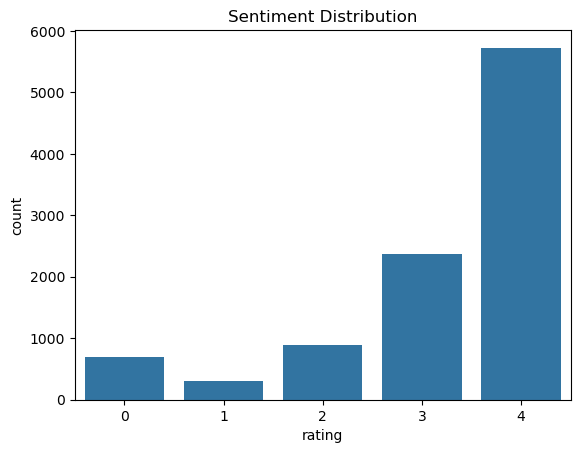

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df["rating"])
plt.title("Sentiment Distribution")
plt.show()
